#  COVID-19 Global Trends Analysis 
**Author:** *Abgael Rehema*  
**Date:** *2025 may 16*

---

## 🧭 Objective

In this analysis, we explore the global trends of the COVID-19 pandemic through data. We will examine cases, deaths, and vaccinations over time, compare countries, and derive insights that highlight disparities, progress, and anomalies in the global response.

---

## 📦 Dataset

The dataset used is the [Our World in Data COVID-19 dataset](https://ourworldindata.org/covid-cases), which includes:
- Daily case and death counts
- Vaccination statistics
- Testing rates
- Healthcare capacity
- Socioeconomic indicators

---


In [2]:
# 📊 Load and preview data
import pandas as pd

# Load the dataset
df = pd.read_csv("owid-covid-data.csv")

# Preview the data
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN


In [3]:
# 🧹 Data Cleaning
df['date'] = pd.to_datetime(df['date'])
df = df[df['continent'].notnull()]  # Remove aggregate entries like 'World'

# Focus on a few countries for comparative analysis
countries = ['United States', 'India', 'Brazil', 'Kenya', 'Germany']
df_countries = df[df['location'].isin(countries)]



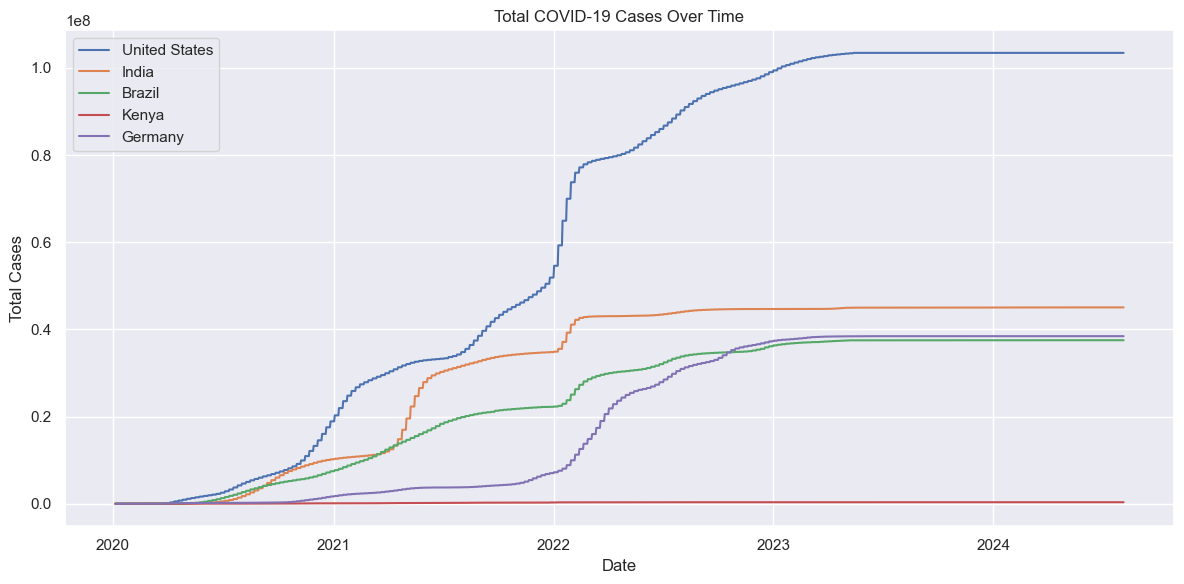

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Preferred way: Let Seaborn handle style
sns.set_theme(style="whitegrid")
sns.set(rc={"figure.figsize": (12, 6)})

# Total Cases Over Time
for country in countries:
    subset = df_countries[df_countries['location'] == country]
    plt.plot(subset['date'], subset['total_cases'], label=country)

plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.tight_layout()
plt.show()


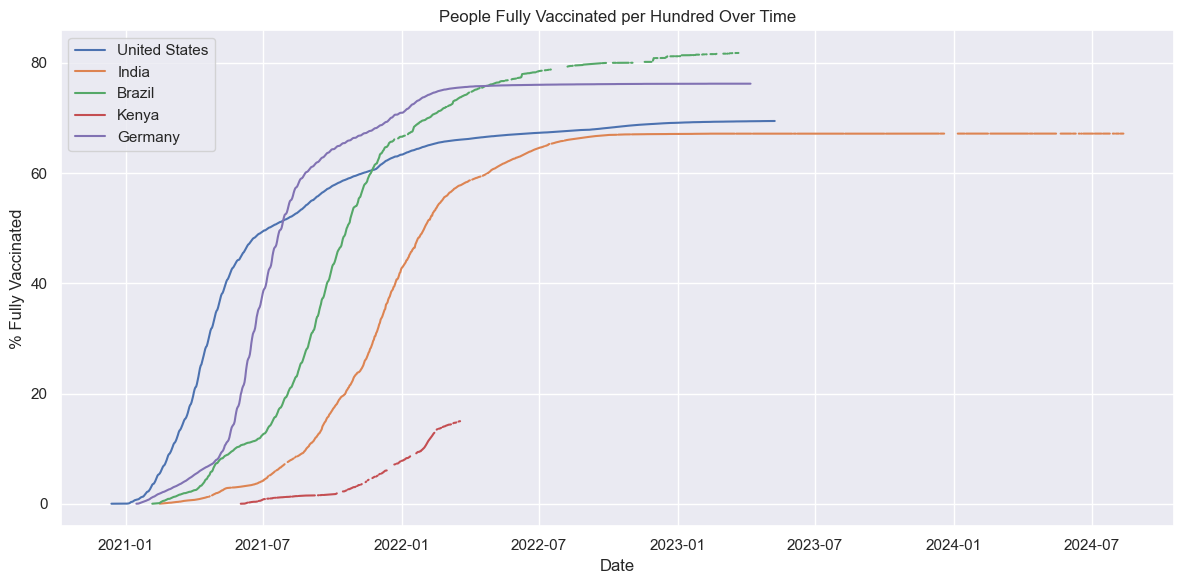

In [5]:
# 💉 Vaccination Progress
for country in countries:
    subset = df_countries[df_countries['location'] == country]
    plt.plot(subset['date'], subset['people_fully_vaccinated_per_hundred'], label=country)

plt.title("People Fully Vaccinated per Hundred Over Time")
plt.xlabel("Date")
plt.ylabel("% Fully Vaccinated")
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13156\1807361531.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='death_rate', y='location', data=df_latest, palette="Reds_r")


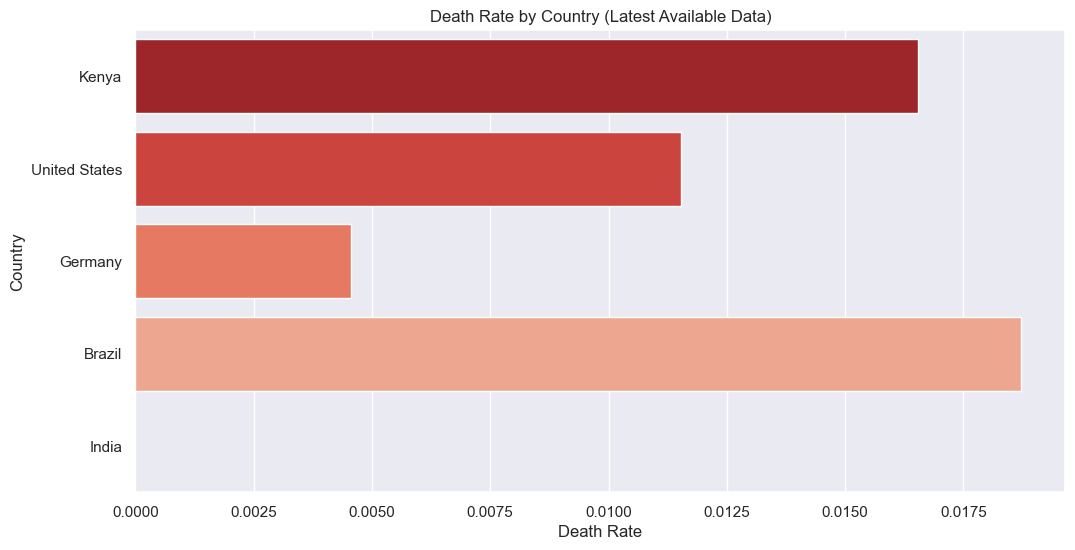

In [9]:
# Death Rate Calculation
df_latest = df_countries.sort_values('date').groupby('location').tail(1)
df_latest['death_rate'] = df_latest['total_deaths'] / df_latest['total_cases']

# Bar chart
sns.barplot(x='death_rate', y='location', data=df_latest, palette="Reds_r")
plt.title("Death Rate by Country (Latest Available Data)")
plt.xlabel("Death Rate")
plt.ylabel("Country")
plt.show()

In [ ]:
# 🔥 Correlation Heatmap
corr_df = df_latest[['total_cases_per_million', 'total_deaths_per_million',
                     'people_fully_vaccinated_per_hundred', 'gdp_per_capita',
                     'hospital_beds_per_thousand', 'diabetes_prevalence']]

sns.heatmap(corr_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Key Indicators")
plt.show()

## 🧠 Key Insights & Storytelling

1. **Vaccine Rollout Disparity:** Wealthier nations like Germany and the USA achieved over 70% full vaccination rates, while Kenya lags behind significantly.
2. **Death Rate Variation:** Despite having similar case counts, death rates vary widely due to healthcare quality, testing, and early response.
3. **GDP Correlation:** There is a visible positive correlation between GDP per capita and vaccination rates, highlighting inequality.
4. **Waves of Infection:** India and Brazil experienced sharp peaks in new cases during early waves, which later stabilized with vaccinations.
5. **Healthcare Indicators Matter:** Countries with more hospital beds per capita and higher health indices show lower death rates.

---

## ✅ Conclusion

This analysis demonstrates that while COVID-19 was a global crisis, its effects were deeply unequal. By examining trends in vaccination, testing, and mortality, we gain a clearer picture of how public health infrastructure and socioeconomic status influenced outcomes.

---

*Thank you for reading.*  
